In [1]:
from sympy import init_session
init_session()
import random,numpy

IPython console for SymPy 0.7.6.1 (Python 3.4.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


In [2]:
my_mat = Matrix(4,4,[random.randrange(100) for i in range(16)])
pprint(my_mat)

⎡61  30  35  0 ⎤
⎢              ⎥
⎢85  89  82  38⎥
⎢              ⎥
⎢74  44  52  53⎥
⎢              ⎥
⎣13  63  18  16⎦


### Here is the helper function for the determinant function
takes a 


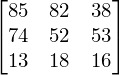

In [3]:
def split_mtx(mtx,row,col):
    mtx.row_del(row)
    mtx.col_del(col)
    return mtx

split_mtx(my_mat.copy(),0,1)

In [4]:
def recurse_det(mtx):
    if len(mtx) == 1:
        print("bottom of recurse")
        pprint(mtx)
        return mtx[0] 
    else:
        pprint(mtx)
        return sum([mtx[0,j]*recurse_det(split_mtx(mtx.copy(),0,j)) if j%2 == 0 else
                    -mtx[0,j]*recurse_det(split_mtx(mtx.copy(),0,j))
                    for j in range(mtx.cols)])
    
print(recurse_det(my_mat))
print(my_mat.det())


stripping
⎡61  30  35  0 ⎤
⎢              ⎥
⎢85  89  82  38⎥
⎢              ⎥
⎢74  44  52  53⎥
⎢              ⎥
⎣13  63  18  16⎦
stripping
⎡89  82  38⎤
⎢          ⎥
⎢44  52  53⎥
⎢          ⎥
⎣63  18  16⎦
stripping
⎡52  53⎤
⎢      ⎥
⎣18  16⎦
bottom of recurse
[16]
bottom of recurse
[18]
stripping
⎡44  53⎤
⎢      ⎥
⎣63  16⎦
bottom of recurse
[16]
bottom of recurse
[63]
stripping
⎡44  52⎤
⎢      ⎥
⎣63  18⎦
bottom of recurse
[18]
bottom of recurse
[63]
stripping
⎡85  82  38⎤
⎢          ⎥
⎢74  52  53⎥
⎢          ⎥
⎣13  18  16⎦
stripping
⎡52  53⎤
⎢      ⎥
⎣18  16⎦
bottom of recurse
[16]
bottom of recurse
[18]
stripping
⎡74  53⎤
⎢      ⎥
⎣13  16⎦
bottom of recurse
[16]
bottom of recurse
[13]
stripping
⎡74  52⎤
⎢      ⎥
⎣13  18⎦
bottom of recurse
[18]
bottom of recurse
[13]
stripping
⎡85  89  38⎤
⎢          ⎥
⎢74  44  53⎥
⎢          ⎥
⎣13  63  16⎦
stripping
⎡44  53⎤
⎢      ⎥
⎣63  16⎦
bottom of recurse
[16]
bottom of recurse
[63]
stripping
⎡74  53⎤
⎢      ⎥
⎣13  16⎦
bottom of recurse
[16]
botto

In [ ]:

def recurse_det_print(mtx):
    if len(mtx) == 1:
        print("bottom of recurse")
        pprint(mtx)
        return mtx 
    else:
        print("stripping")
        pprint(mtx)
        return sum([mtx[0,i]*recurse_det(split_mtx(mtx.copy(),0,i))[0] if i%2 == 0 else
                    -mtx[0,i]*recurse_det(split_mtx(mtx.copy(),0,i))[0]
                    for i in range(mtx.cols)])
    

In [ ]:
%debug

> <ipython-input-20-68567a551b83>(18)<listcomp>()
     16         return sum([mtx[0,i]*recurse_det(split_mtx(mtx.copy(),0,i))[0] if i%2 == 0 else
     17                     -mtx[0,i]*recurse_det(split_mtx(mtx.copy(),0,i))[0]
---> 18                     for i in range(mtx.cols)])
     19 
     20 recurse_det(my_mat)

ipdb> mtx
Matrix([
[66, 92, 93],
[30, 28, 22],
[26, 89, 86]])
ipdb> mtx.cols
3
ipdb> i
0


In [9]:
my_mat = Matrix(4,4,[random.randrange(100) if random.randrange(5) > 1 else 0 for i in range(16)])


def add_to_mtx(original,addition):
    for col in range(addition.shape[1]):
        original = original.col_insert(original.cols,addition[:,col])
    return original


def calculate_inverse(mtx):
    row,col = mtx.shape
    if row != col:
        print('not invertible')
        return mtx
    else:
        extended_mtx = add_to_mtx(mtx,eye(mtx.shape[0]))
        inv = RREF_real.shortEF(extended_mtx)[:,mtx.shape[1]:]
        return inv
inv = calculate_inverse(my_mat)

In [10]:
pprint(my_mat)
pprint(inv)
pprint(my_mat*inv)

⎡42  0   83  0 ⎤
⎢              ⎥
⎢52  0   0   67⎥
⎢              ⎥
⎢21  95  6   18⎥
⎢              ⎥
⎣82  50  34  50⎦
⎡-19631   -31955   -27805    105659 ⎤
⎢───────  ───────  ───────  ─────── ⎥
⎢1261952  1261952  1261952  2523904 ⎥
⎢                                   ⎥
⎢ -135    -11127    72263   -22209  ⎥
⎢───────  ───────  ───────  ────────⎥
⎢1261952  6309760  6309760  12619520⎥
⎢                                   ⎥
⎢12569     8085     7035    -26733  ⎥
⎢──────   ──────   ──────   ─────── ⎥
⎢630976   630976   630976   1261952 ⎥
⎢                                   ⎥
⎢ 3809    10909     5395    -20501  ⎥
⎢──────   ──────   ──────   ─────── ⎥
⎣315488   315488   315488    630976 ⎦
⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦


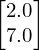

In [16]:
Matrix([[1,2],[4,3]])*Matrix([[8/5],[1/5]])

In [6]:
import RREF_real
